In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(["day","month","year"], axis = 1, inplace = True)

In [5]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [6]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [7]:
X = df.drop("FWI", axis = 1)
y = df["FWI"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

<Axes: >

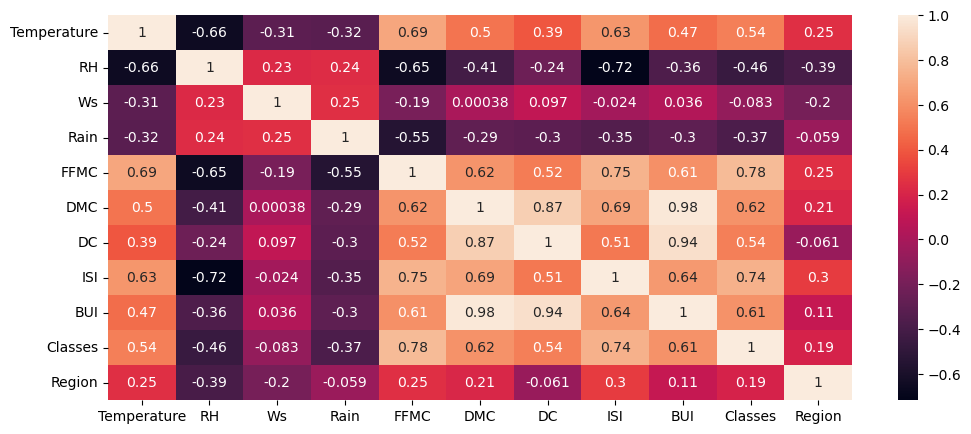

In [10]:
plt.figure(figsize = (12,5))
sns.heatmap(X_train.corr(), annot = True)

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    col_mattrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(col_mattrix.iloc[i,j]) > threshold:
                colname = col_mattrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [12]:
corr_feature = correlation(X_train,0.85)

In [13]:
corr_feature

{'BUI', 'DC'}

In [14]:
X_train.drop(corr_feature, axis = 1, inplace = True)
X_test.drop(corr_feature, axis = 1, inplace = True)

In [15]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)

In [16]:
X_test_scaled = scaling.transform(X_test)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8628\3191650639.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train_after_scaling')

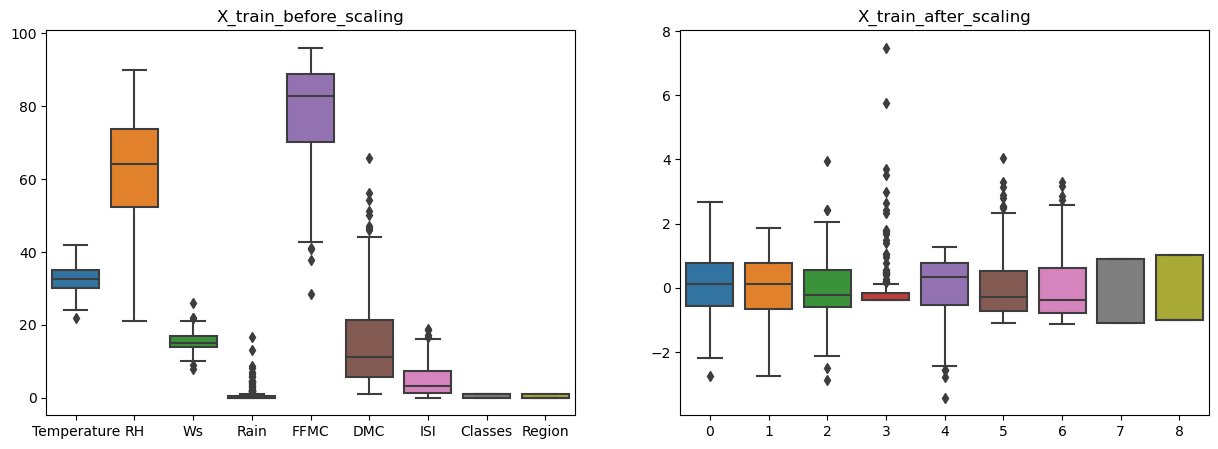

In [17]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data =X_train)
plt.title("X_train_before_scaling")

plt.subplot(1,2,2)
sns.boxplot(data =X_train_scaled)
plt.title("X_train_after_scaling")

Mean absolute error : 0.5468236465249976
r2 score : 0.9839977157632893


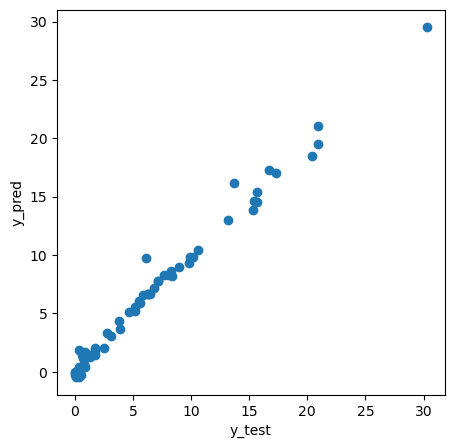

In [18]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


Mean absolute error : 1.1331759949144085
r2 score : 0.9264742326805692


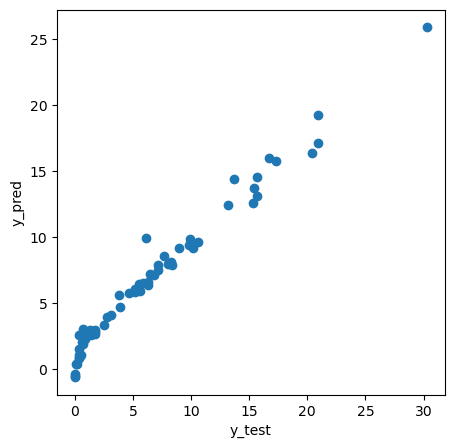

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


Mean absolute error : 0.6199701158263431
r2 score : 0.980851982434192


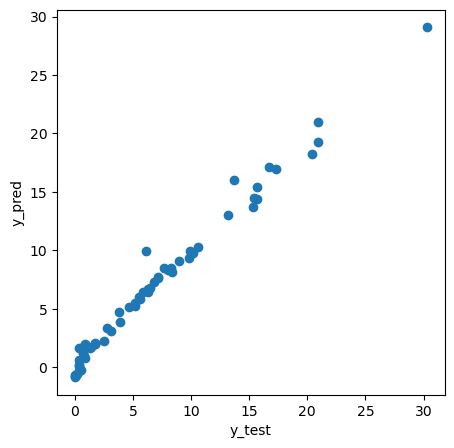

In [20]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()



Mean absolute error : 0.5642305340105693
r2 score : 0.9834070933284212


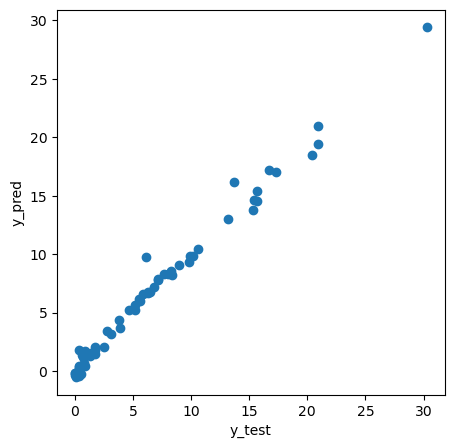

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()



Mean absolute error : 0.5642305340105693
r2 score : 0.9834070933284212


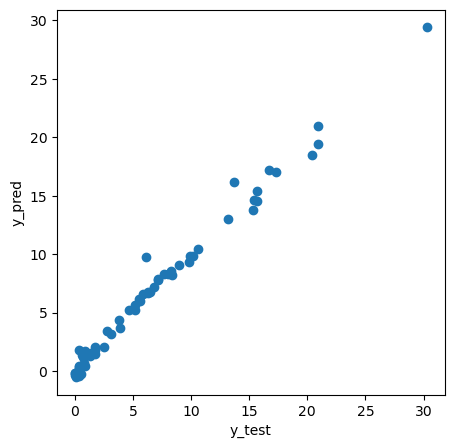

In [22]:
from sklearn.linear_model import RidgeCV
Ridgecv = RidgeCV(cv = 5)
Ridgecv.fit(X_train_scaled,y_train)
y_pred = Ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test") 
plt.ylabel("y_pred")
plt.show()



Mean absolute error : 1.8822353634896
r2 score : 0.7814447243400926


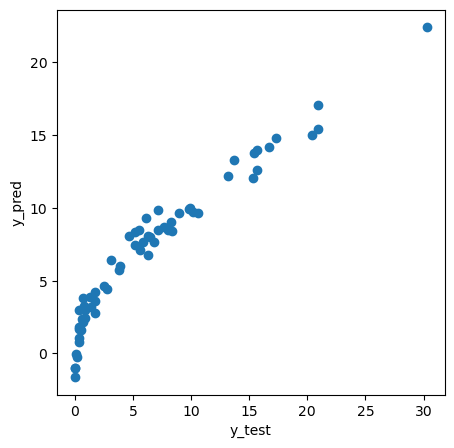

In [23]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()



Mean absolute error : 0.6575946731430904
r2 score : 0.9799084998743879


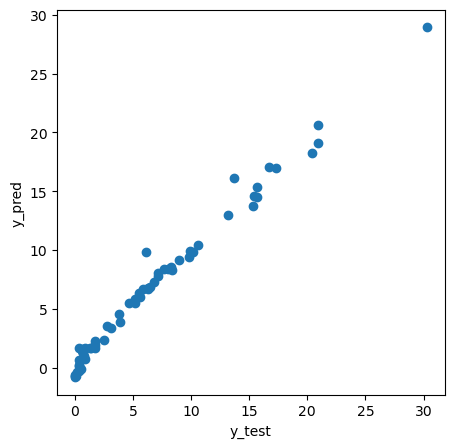

In [24]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv = 5)
ElasticNetCV.fit(X_train_scaled,y_train)
y_pred = ElasticNetCV.predict(X_test_scaled)
mae = mean_absolute_error(y_pred,y_test)
score = r2_score(y_pred,y_test)
print(f"Mean absolute error : {mae}")
print(f"r2 score : {score}")
plt.figure(figsize =(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel("y_test") 
plt.ylabel("y_pred")
plt.show()



# Pickling the file

In [25]:
scaling

StandardScaler()

In [26]:
ridge

Ridge()

In [27]:
import pickle
pickle.dump(scaling, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))

